In [9]:
'''@author: Zi Xian Leong (zxleong@psu.edu) '''

import numpy as np
import matplotlib.pyplot as plt
from random import uniform as rand
import scipy.io as sio
import os
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize
from sklearn.metrics import accuracy_score
from sklearn import preprocessing as pp

from numpy.matlib import repmat

from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import scipy.ndimage.filters as fil
from keras import backend as K
from matplotlib.ticker import FormatStrFormatter
from scipy.signal import savgol_filter

from tqdm import tqdm
import scipy.stats
from scipy.signal import tukey
import sys
# runPath = os.path.dirname(os.path.realpath("GPRNet.py"))
# sys.path.append(os.path.join(runPath, ".."))
from DLcodes.GPRNet import GPRNet
import seaborn as sns
import string
import matplotlib



In [3]:
#Load files

X_train = np.load('Synthetic/Data/1D/ForDL/Synthetic_Xtrain_1d.npy')
X_valid = np.load('Synthetic/Data/1D/ForDL/Synthetic_yvalid_1d.npy')
X_test = np.load('Synthetic/Data/1D/ForDL/Synthetic_Xtest_1d.npy')
y_train = np.load('Synthetic/Data/1D/ForDL/Synthetic_ytrain_1d.npy')
y_valid = np.load('Synthetic/Data/1D/ForDL/Synthetic_yvalid_1d.npy')
y_true = np.load('Synthetic/Data/1D/ForDL/Synthetic_yTrue_1d.npy')
y_pred = np.load('Synthetic/Data/1D/ForDL/Synthetic_ypred_1D.npy')

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_true.shape)
print(y_pred.shape)


(9800, 1280)
(99, 1280)
(100, 1280)
(9800, 1280)
(99, 1280)
(100, 1280)
(100, 1280)


## Perform prediction on Testing data with dropout enabled.


In [ ]:
#select three arbitary predictions: ind=10,38,42

base_path = 'Synthetic/Weights/'
model_name = 'weight_GPRNet_n16k20.h5' 

#dropout of 0.05
cnn_model = GPRNet(im_width=1, im_height=1280, neurons=16, kern_sz = 20,enable_dropout=True,dp_coeff=0.05 ) 
cnn_model.load_weights(base_path+model_name)
all_dropout_predictions_0p05 = dict()
for itr_ind in tqdm([10,38,42]):
# for itr_ind in tqdm(range(100)):
    chosen_gt = y_true[itr_ind]
    chosen_X_Test = np.expand_dims(np.expand_dims(X_test[itr_ind],axis=0),axis=2)
    arr_preds = []
    for itr_sim in (range(300)): #number of itr
        intermediate_pred = np.squeeze(cnn_model.predict(chosen_X_Test)[0],axis=1)
        arr_preds.append(intermediate_pred)
    arr_preds = np.array(arr_preds)
    all_dropout_predictions_0p05['ind{}'.format(itr_ind)] = arr_preds
    
#dropout of 0.10
cnn_model = GPRNet(im_width=1, im_height=1280, neurons=16, kern_sz = 20,enable_dropout=True,dp_coeff=0.10 ) 
cnn_model.load_weights(base_path+model_name)
all_dropout_predictions_0p1 = dict()
for itr_ind in tqdm([10,38,42]):
# for itr_ind in tqdm(range(100)):
    chosen_gt = y_true[itr_ind]
    chosen_X_Test = np.expand_dims(np.expand_dims(X_test[itr_ind],axis=0),axis=2)
    arr_preds = []
    for itr_sim in (range(300)): #number of itr
        intermediate_pred = np.squeeze(cnn_model.predict(chosen_X_Test)[0],axis=1)
        arr_preds.append(intermediate_pred)
    arr_preds = np.array(arr_preds)
    all_dropout_predictions_0p1['ind{}'.format(itr_ind)] = arr_preds
    
#dropout of 0.20
cnn_model = GPRNet(im_width=1, im_height=1280, neurons=16, kern_sz = 20,enable_dropout=True,dp_coeff=0.20 ) 
cnn_model.load_weights(base_path+model_name)
all_dropout_predictions_0p2 = dict()
for itr_ind in tqdm([10,38,42]):
# for itr_ind in tqdm(range(100)):
    chosen_gt = y_true[itr_ind]
    chosen_X_Test = np.expand_dims(np.expand_dims(X_test[itr_ind],axis=0),axis=2)
    arr_preds = []
    for itr_sim in (range(300)): #number of itr
        intermediate_pred = np.squeeze(cnn_model.predict(chosen_X_Test)[0],axis=1)
        arr_preds.append(intermediate_pred)
    arr_preds = np.array(arr_preds)
    all_dropout_predictions_0p2['ind{}'.format(itr_ind)] = arr_preds

    
#save
# np.save('UQ/Data/Synthetic/all_dropout_predictions_0p05.npy',all_dropout_predictions_0p05)
# np.save('UQ/Data/Synthetic/all_dropout_predictions_0p1.npy',all_dropout_predictions_0p1)
# np.save('UQ/Data/Synthetic/all_dropout_predictions_0p2.npy',all_dropout_predictions_0p2)


In [8]:
#Load data for easier reproducibility
all_dropout_predictions_0p1 = np.load('UQ/Data/Synthetic/all_dropout_predictions_0p1.npy', allow_pickle=True).item()
all_dropout_predictions_0p2 = np.load('UQ/Data/Synthetic/all_dropout_predictions_0p2.npy', allow_pickle=True).item()
all_dropout_predictions_0p05 = np.load('UQ/Data/Synthetic/all_dropout_predictions_0p05.npy', allow_pickle=True).item()

## Compare different dropout rates - Figure 11

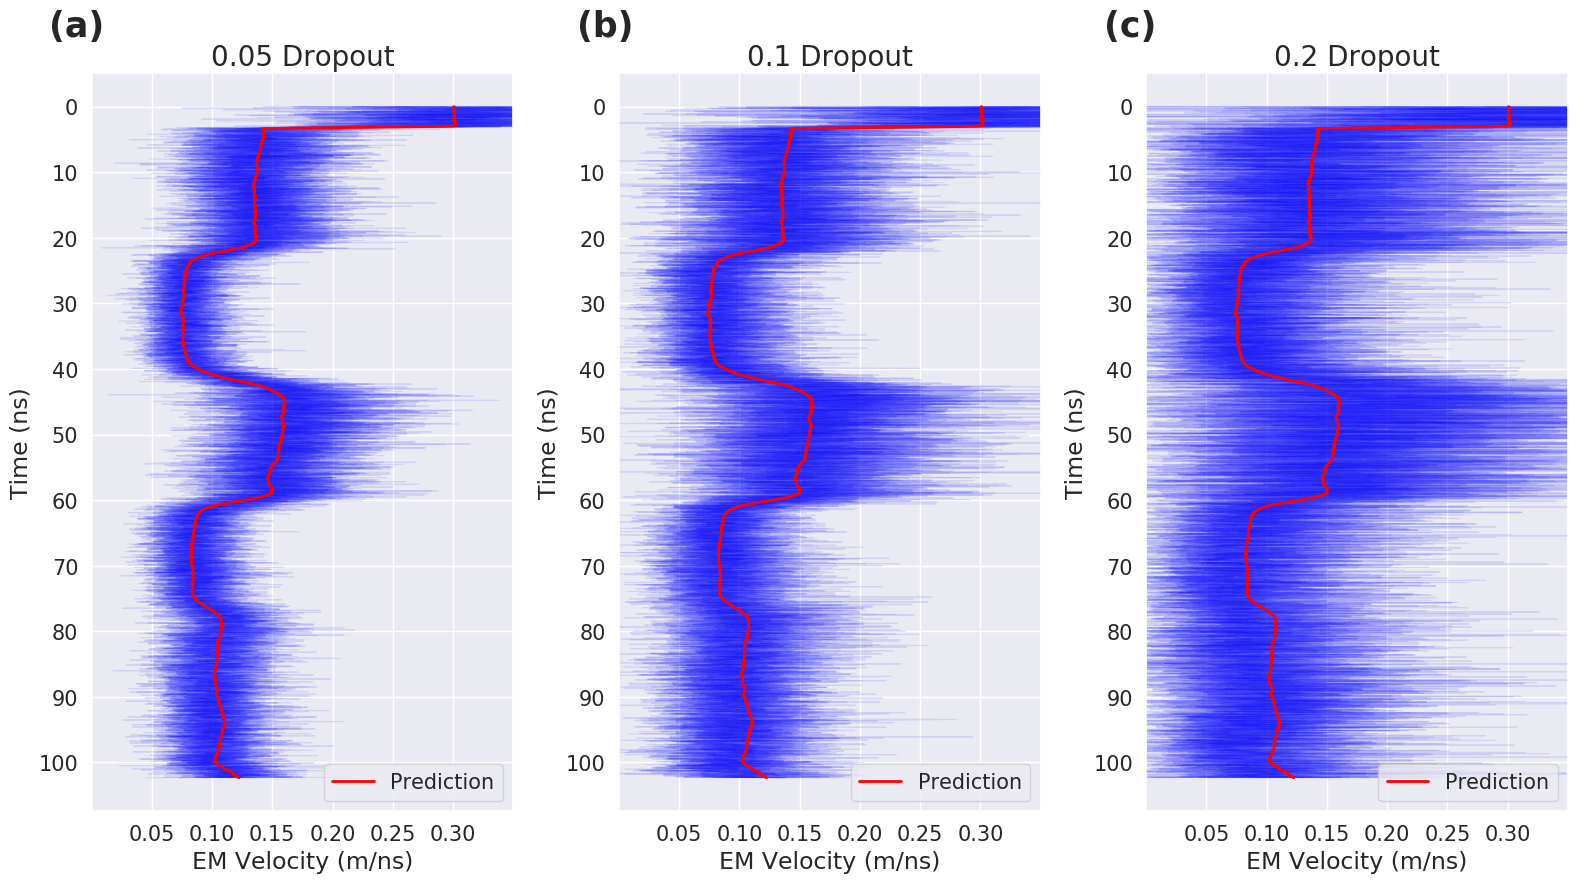

In [27]:
sns.set_theme(style='darkgrid')
def figure11():

    fig,axs =plt.subplots(1,3,figsize=(16,9))
    ax = axs[0]
    ax.invert_yaxis()
    x = np.arange(1280)
    sns.set_theme(style='darkgrid')
    for i in range(20):
        ax.plot(all_dropout_predictions_0p05['ind42'][i],x,color='blue',linewidth=0.8, alpha=0.1)
    ax.plot(y_pred[42],x,label='Prediction', color='red', linewidth=2)
    ax.set_xlabel('EM Velocity (m/ns)', fontsize=17)
    ax.set_ylabel('Time (ns)', fontsize=17)
    ax.set_xticks(np.arange(0.05,0.35,0.05))
    ax.set_xticklabels(np.arange(0.05,0.35,0.05),fontsize=15)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax.set_yticks(np.arange(0,1300,125))
    ax.set_yticklabels(np.arange(0,110,10),fontsize=15)
    ax.set_xlim(0,0.35)
    ax.legend(loc=4,fontsize=15)
    ax.set_title('0.05 Dropout',fontsize=20)
    ax.text(-0.1, 1.05, '('+string.ascii_lowercase[0]+')', transform=ax.transAxes, size=25, weight='bold')
    
    ax2 = axs[1]
    ax2.invert_yaxis()
    x = np.arange(1280)
    for i in range(20):
        ax2.plot(all_dropout_predictions_0p1['ind42'][i],x,color='blue',linewidth=0.8, alpha=0.1)
    ax2.plot(y_pred[42],x,label='Prediction', color='red', linewidth=2)
    ax2.set_xlabel('EM Velocity (m/ns)', fontsize=17)
    ax2.set_ylabel('Time (ns)', fontsize=17)
    ax2.set_xticks(np.arange(0.05,0.35,0.05))
    ax2.set_xticklabels(np.arange(0.05,0.35,0.05),fontsize=15)
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax2.set_yticks(np.arange(0,1300,125))
    ax2.set_yticklabels(np.arange(0,110,10),fontsize=15)
    ax2.set_xlim(0,0.35)
    fig.tight_layout()
    ax2.legend(loc=4,fontsize=15)
    ax2.set_title('0.1 Dropout',fontsize=20)
    ax2.text(-0.1, 1.05, '('+string.ascii_lowercase[1]+')', transform=ax2.transAxes, size=25, weight='bold')
    
    ax3 = axs[2]
    ax3.invert_yaxis()
    x = np.arange(1280)
    for i in range(20):
        ax3.plot(all_dropout_predictions_0p2['ind42'][i],x,color='blue',linewidth=0.8, alpha=0.1)
    ax3.plot(y_pred[42],x,label='Prediction', color='red', linewidth=2)
    ax3.set_xlabel('EM Velocity (m/ns)', fontsize=17)
    ax3.set_ylabel('Time (ns)', fontsize=17)
    ax3.set_xticks(np.arange(0.05,0.35,0.05))
    ax3.set_xticklabels(np.arange(0.05,0.35,0.05),fontsize=15)
    ax3.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax3.set_yticks(np.arange(0,1300,125))
    ax3.set_yticklabels(np.arange(0,110,10),fontsize=15)
    ax3.set_xlim(0,0.35)
    fig.tight_layout()
    ax3.legend(loc=4,fontsize=15)
    ax3.set_title('0.2 Dropout',fontsize=20)
    ax3.text(-0.1, 1.05, '('+string.ascii_lowercase[2]+')', transform=ax3.transAxes, size=25, weight='bold')
    
    
figure11()

## Show samples of histogram - Figure 12

/home/zixian/.conda/envs/tfenv/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


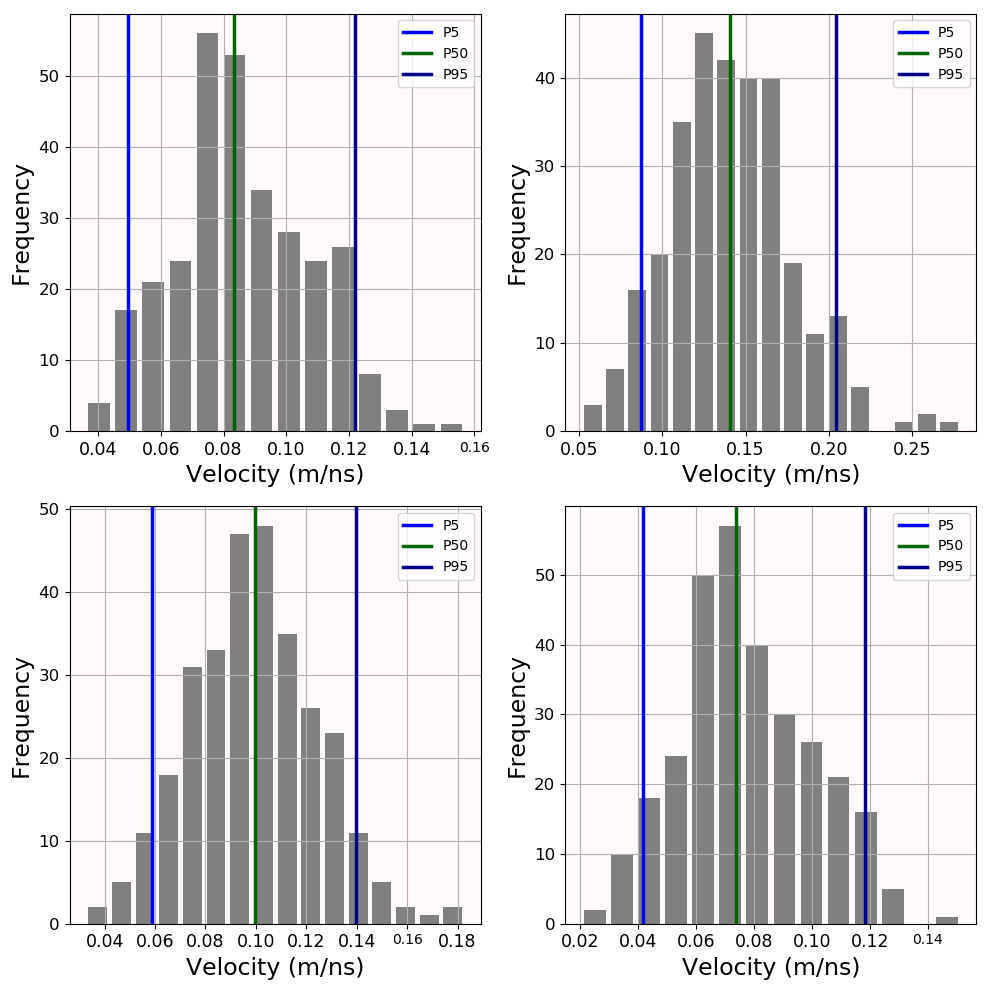

In [26]:
#in the paper, we assume dropout of 0.05 is the best; we use example ind42 for display purposes

matplotlib.rcdefaults()
all_uncerts = dict()

for i in [10,38,42]:
    for j in [5,50,95]:
        all_uncerts['ind{}_p{}'.format(i,j)] = np.percentile(all_dropout_predictions_0p05['ind{}'.format(i)],j,axis=0)
    
def figure12_smaller():
    rseed = 1208977988
    np.random.seed(rseed)
    fig,axs =plt.subplots(2,2,figsize=(10,10))
    for i in range(2):
        for j in range(2):
            randind = np.random.randint(1280)
            ax = axs[i,j]
            ax.set_facecolor('snow')
            ax.hist(all_dropout_predictions_0p05['ind42'][:,randind],bins='auto',rwidth=0.8,color='grey')
            ax.axvline(all_uncerts['ind42_p5'][randind],color='blue',linewidth=2.5,label='P5')
            ax.axvline(all_uncerts['ind42_p50'][randind],color='darkgreen',linewidth=2.5,label='P50')
            ax.axvline(all_uncerts['ind42_p95'][randind],color='darkblue',linewidth=2.5,label='P95')
            ax.set_xticklabels(np.arange(0,0.35,0.05),fontsize=12.5)
            ax.set_yticklabels(np.arange(0,60,10),fontsize=12)
            ax.grid('on')
            ax.set_xlabel('Velocity (m/ns)',fontsize=17)
            ax.set_ylabel('Frequency',fontsize=17)
            ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            ax.legend()
    plt.tight_layout()    
    
figure12_smaller()

## Putting together P5 and P95 (of 1D EM velocity predition) to create uncertainties - Figure 13

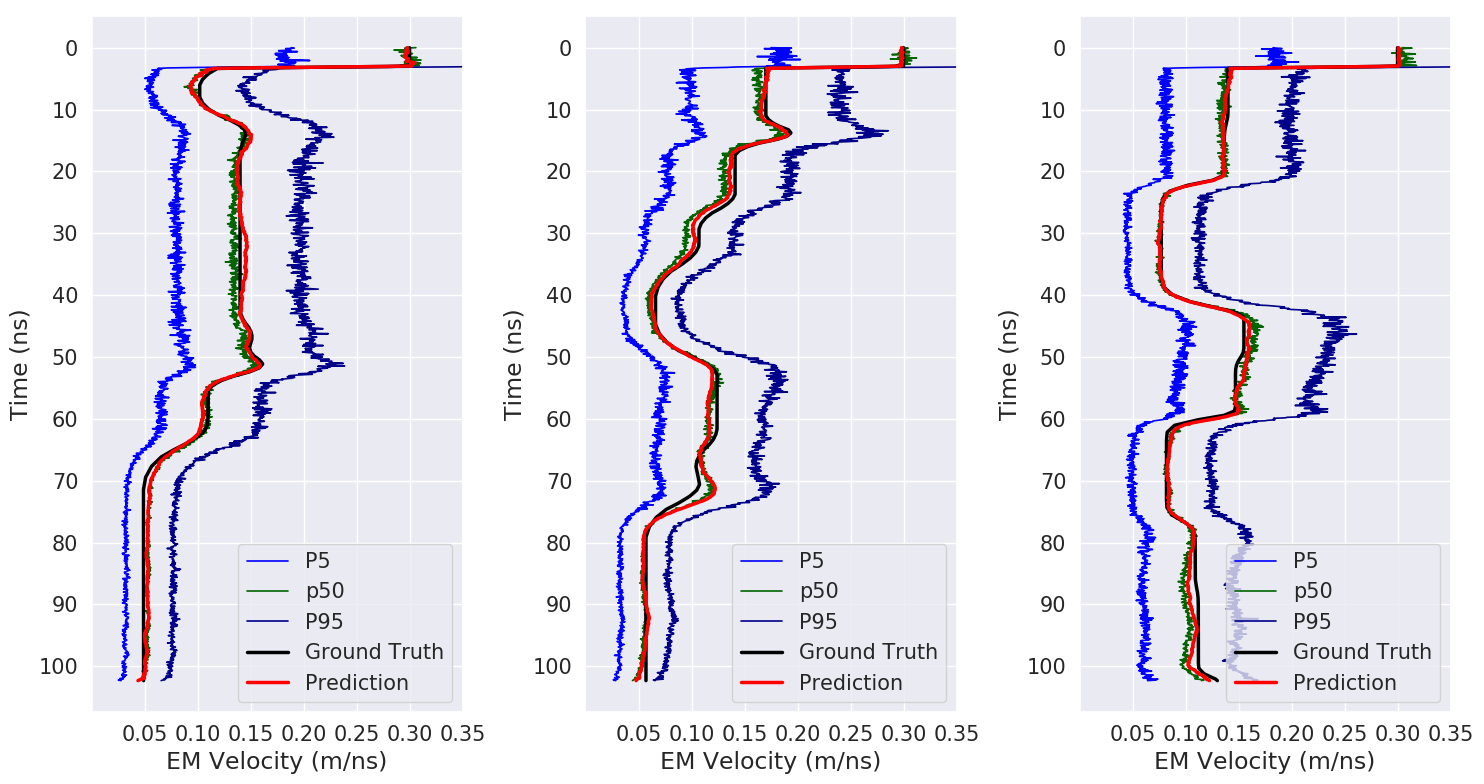

In [16]:
'''Show uncertainties for each random profile'''
sns.set_theme(style='darkgrid')

def figure13():
    fig,axs =plt.subplots(1,3,figsize=(15,8))
    sns.set_theme(style='darkgrid')
    for i,ind in enumerate([10,38,42]):
        ax = axs[i]
        ax.invert_yaxis()
        x = np.arange(1280)
        ax.plot(all_uncerts['ind{}_p5'.format(ind)],x,label='P5', color='blue', linewidth=1.2, linestyle='-')
        ax.plot(all_uncerts['ind{}_p50'.format(ind)],x,label='p50', color='darkgreen', linewidth=1.2, linestyle='-')
        ax.plot(all_uncerts['ind{}_p95'.format(ind)],x,label='P95', color='darkblue', linewidth=1.2, linestyle='-')
        ax.plot(y_true[ind],x,label='Ground Truth', color='black', linewidth=2.5)
        ax.plot(y_pred[ind],x,label='Prediction', color='red', linewidth=2.5)
    
        ax.set_xlabel('EM Velocity (m/ns)', fontsize=17)
        ax.set_ylabel('Time (ns)', fontsize=17)
        ax.set_xticks(np.arange(0.05,0.40,0.05))
        ax.set_xticklabels(np.arange(0.05,0.40,0.05),fontsize=15)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_yticks(np.arange(0,1300,125))
        ax.set_yticklabels(np.arange(0,110,10),fontsize=15)
        ax.legend(loc=4,fontsize=15)
        ax.set_xlim(0,0.35)
        fig.tight_layout()

figure13()

## Now, see how well this UQ method holds for the synthetic 2D velocity model 

In [ ]:
#first, load synthetic 2D velocity models, i.e. prediction and ground truth

In [17]:
ypred2D_td = np.load('Synthetic/Data/2D/ypred2D.npy').T
gt2D_td = np.load('Synthetic/Data/2D/yTrue2D_vel_td.npy')
xtest_img = np.load('Synthetic/Data/2D/xTest2D_img.npy')

print(ypred2D_td.shape)
print(gt2D_td.shape)
print(gt2D_td.shape)


(1280, 251)
(1280, 251)
(1280, 251)


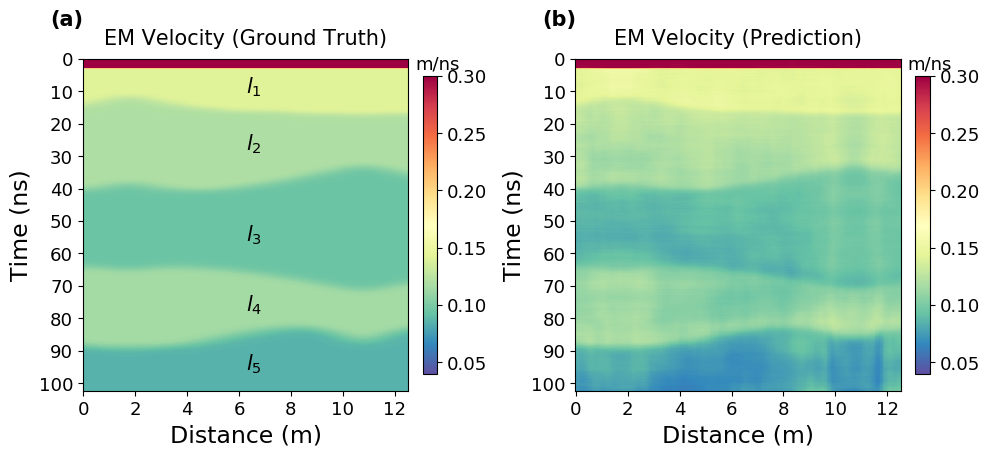

In [19]:
#Display our 2D prediction vs Ground Truth just to check
matplotlib.rcdefaults()

def compare_prediction():
    fig,axs = plt.subplots(1,2,figsize=(10,18))
    xylabelfontsize=17
    tickfontsize=13
    titlefontsize=15
    titlepadsize = 10
    subtitlesfontsize = 15
    subtitlesPos = [-0.1,1.1]
    matplotlib.rcdefaults()
    
    
    ax = axs[0]
    im = ax.imshow(gt2D_td/1e9,cmap='Spectral_r',vmin=0.04,vmax=0.3)
    ax.set_xlabel('Distance (m)', fontsize=xylabelfontsize)
    ax.set_xticks(np.arange(0,251,40)) #dx is 0.05, so 20 cell is 1m
    ax.set_xticklabels(np.arange(0,13,2),fontsize=tickfontsize)
    ax.set_ylabel('Time (ns)', fontsize=xylabelfontsize)
    ax.set_aspect(aspect=0.2)
    ax.set_yticks(np.arange(0,1300,125)) #dt is 8e-11
    ax.set_yticklabels(np.arange(0,110,10),fontsize=tickfontsize)
    cbar = plt.colorbar(im, ax=ax,fraction=0.042, pad=0.04)
    cbar.ax.tick_params(labelsize=tickfontsize) 
    cbar.ax.set_xlabel('m/ns',fontsize=tickfontsize)
    cbar.ax.xaxis.set_label_coords(1,1.07)
    ax.set_title('EM Velocity (Ground Truth)',fontsize=titlefontsize, pad=titlepadsize)
    ax.text(subtitlesPos[0],subtitlesPos[1], '('+string.ascii_lowercase[0]+')', transform=ax.transAxes, size=subtitlesfontsize, weight='bold')
    ax.text(125,130,r'$l_1$',fontsize=15)
    ax.text(125,350,r'$l_2$',fontsize=15)
    ax.text(125,700,r'$l_3$',fontsize=15)
    ax.text(125,970,r'$l_4$',fontsize=15)
    ax.text(125,1200,r'$l_5$',fontsize=15)
        
    ax2 = axs[1]
    im2 = ax2.imshow(ypred2D_td/1e9,cmap='Spectral_r',vmin=0.04,vmax=0.3)
    ax2.set_xlabel('Distance (m)', fontsize=xylabelfontsize)
    ax2.set_xticks(np.arange(0,251,40)) #dx is 0.05, so 20 cell is 1m
    ax2.set_xticklabels(np.arange(0,13,2),fontsize=tickfontsize)
    ax2.set_ylabel('Time (ns)', fontsize=xylabelfontsize)
    ax2.set_aspect(aspect=0.2)
    ax2.set_yticks(np.arange(0,1300,125)) #dt is 8e-11
    ax2.set_yticklabels(np.arange(0,110,10),fontsize=tickfontsize)
    cbar2 = plt.colorbar(im2, ax=ax2,fraction=0.042, pad=0.04)
    cbar2.ax.tick_params(labelsize=tickfontsize) 
    cbar2.ax.set_xlabel('m/ns',fontsize=tickfontsize)
    cbar2.ax.xaxis.set_label_coords(1,1.07)
    ax2.set_title('EM Velocity (Prediction)',fontsize=titlefontsize,pad=titlepadsize)
    ax2.text(subtitlesPos[0],subtitlesPos[1], '('+string.ascii_lowercase[1]+')', transform=ax2.transAxes, size=subtitlesfontsize, weight='bold')

    fig.tight_layout()

compare_prediction()

In [ ]:
#Looks good, now simulate the uncertainties
#use ind 40,120,160, this translate to at 2.0m, 6.0m and 8.0m, as dx=0.05

base_path = 'Synthetic/Weights/'
model_name = 'weight_GPRNet_n16k20.h5' 

all2D_dropout_predictions = dict()
cnn_model = GPRNet(im_width=1, im_height=1280, neurons=16, kern_sz = 20,enable_dropout=True,dp_coeff=0.05 ) #use this
cnn_model.load_weights(base_path+model_name)
for itr_ind in tqdm([40,120,160]): #use this because simulating over 251 will take a long time
# for itr_ind in tqdm(range(251)):
    chosen_gt = gt2D_td[:,itr_ind]
    arr_preds = []
    for itr_sim in (range(300)): #number of itr
        chosen_X_Test = np.expand_dims(np.expand_dims(xtest_img[:,itr_ind],axis=0),axis=2)
        intermediate_pred = np.squeeze(cnn_model.predict(chosen_X_Test)[0],axis=1)
        arr_preds.append(intermediate_pred)
    arr_preds = np.array(arr_preds)
    all2D_dropout_predictions['ind{}'.format(itr_ind)] = arr_preds


#save
# np.save('UQ/Data/Synthetic/all2D_dropout_predictions_example.npy',all2D_dropout_predictions)


## Put profiles at 2.0m, 6.0m, and 8.0m together - Figure 14

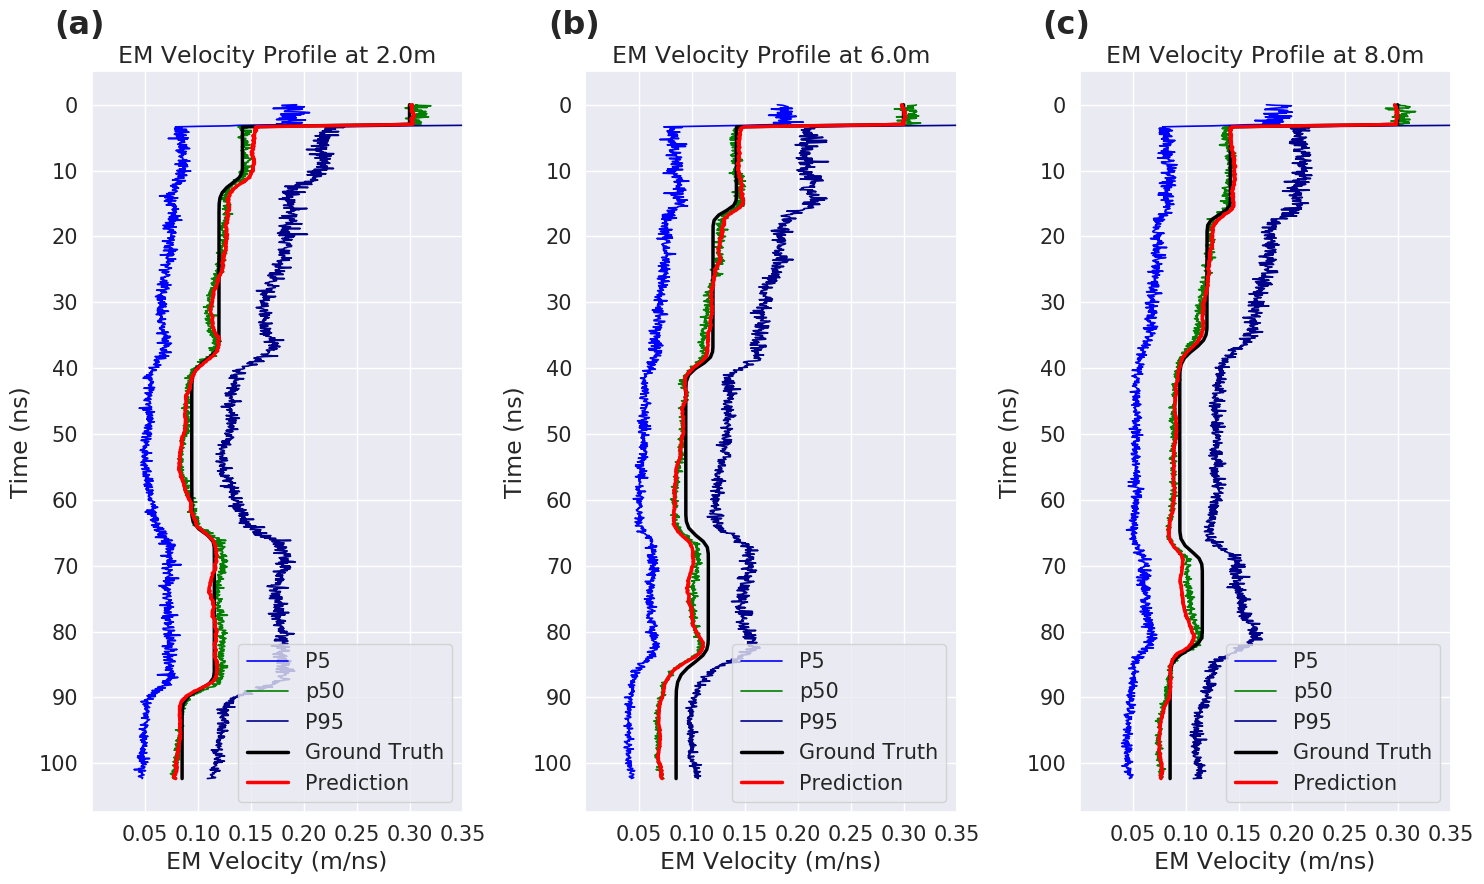

In [25]:
all2D_dropout_predictions = np.load('UQ/Data/Synthetic/all2D_dropout_predictions_example.npy',allow_pickle=True).item()


all2D_uncerts = dict()

for i in [40,120,160]:
    for j in [5,50,95]:
        all2D_uncerts['ind{}_p{}'.format(i,j)] = np.percentile(all2D_dropout_predictions['ind{}'.format(i)],j,axis=0)
sns.set_theme(style='darkgrid')    
def figure13():        
    fig,axs =plt.subplots(1,3,figsize=(15,9)) 
    
    for i,ind in enumerate([40,120,160]):
        ax = axs[i]
        ax.invert_yaxis()
        x = np.arange(1280)
        ax.plot(all2D_uncerts['ind{}_p5'.format(ind)],x,label='P5', color='blue', linewidth=1.2, linestyle='-')
        ax.plot(all2D_uncerts['ind{}_p50'.format(ind)],x,label='p50', color='green', linewidth=1.2, linestyle='-')
        ax.plot(all2D_uncerts['ind{}_p95'.format(ind)],x,label='P95', color='darkblue', linewidth=1.2, linestyle='-')
        ax.plot(gt2D_td[:,ind]/1e9,x,label='Ground Truth', color='black', linewidth=2.5)
        ax.plot(ypred2D_td[:,ind]/1e9,x,label='Prediction', color='red', linewidth=2.5)
    
        ax.set_xlabel('EM Velocity (m/ns)', fontsize=17)
        ax.set_ylabel('Time (ns)', fontsize=17)
        ax.set_xticks(np.arange(0.05,0.40,0.05))
        ax.set_xticklabels(np.arange(0.05,0.40,0.05),fontsize=15)
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        ax.set_yticks(np.arange(0,1300,125))
        ax.set_yticklabels(np.arange(0,110,10),fontsize=15)
        ax.legend(loc=4,fontsize=15)
        ax.set_title('EM Velocity Profile at {}m'.format(ind*0.05),fontsize=17)
        ax.set_xlim(0,0.35)
        ax.text(-0.1, 1.05, '('+string.ascii_lowercase[i]+')', transform=ax.transAxes, size=23, weight='bold')
        fig.tight_layout()
        
figure13()